## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

### Import Dataset

In [2]:
data = pd.read_csv('bank-full.csv', sep=';')

### Exploratory Data Analysis

In [3]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Data Types of the Attributes in the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Descriptive Statistics

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Target Variable Distribution

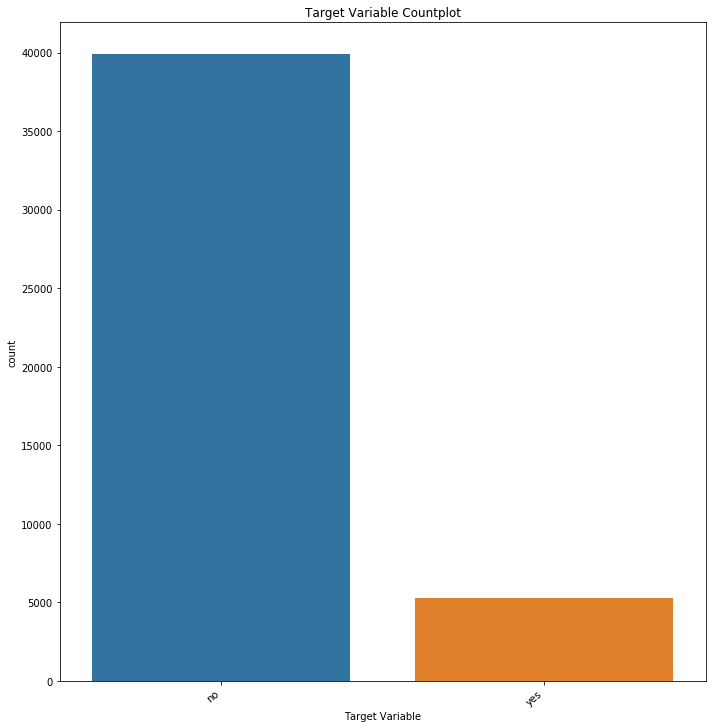

In [6]:
plt.figure(figsize=(10,10))
ax= sns.countplot(x="y", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Target Variable')
plt.tight_layout()
plt.title('Target Variable Countplot')
plt.show()

### Job Pie Chart

In [7]:
occupation = pd.value_counts(data['job'].values, sort=True)
occupationLabel= data.job.unique()

Text(0.5, 1.0, 'Pie Chart Showing the Occupations of the Participants in the Dataset')

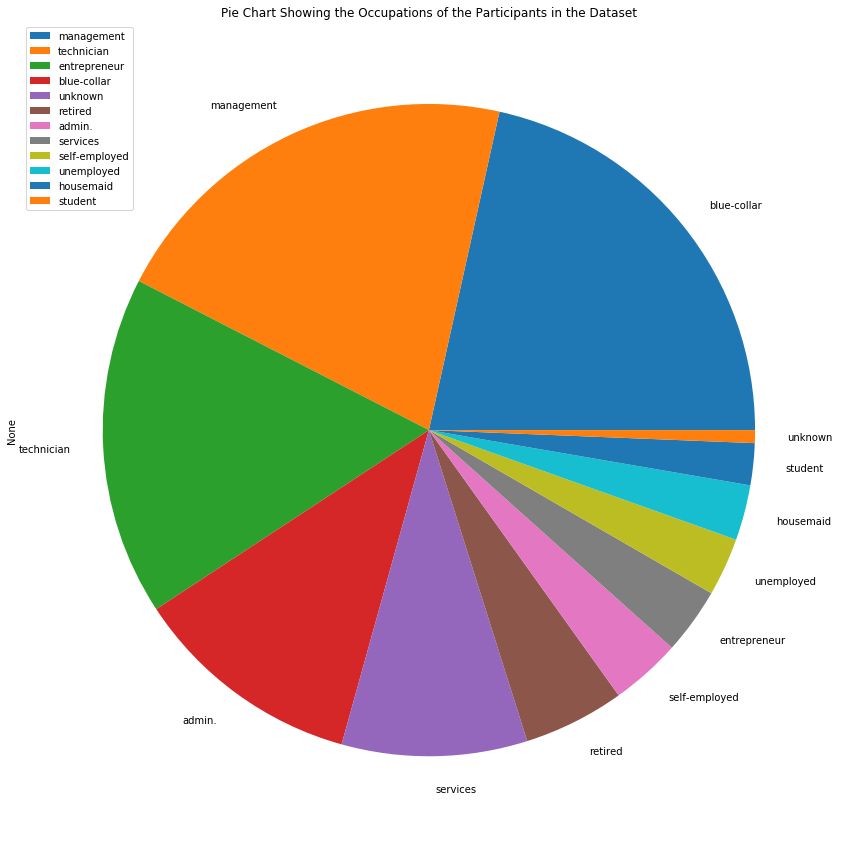

In [8]:
plt.figure(figsize=(25,15))
occupation.plot.pie()
plt.legend(occupationLabel, loc="best")
plt.title('Pie Chart Showing the Occupations of the Participants in the Dataset', fontdict=None, loc='center', pad=None)

### Marital Status Horizontal Barplot

In [9]:
marital_status = pd.value_counts(data['marital'].values, sort=True)

Text(0.5, 1.0, 'Horizontal Bar Plot Showing the Marital Statuses of the Participants in the Dataset')

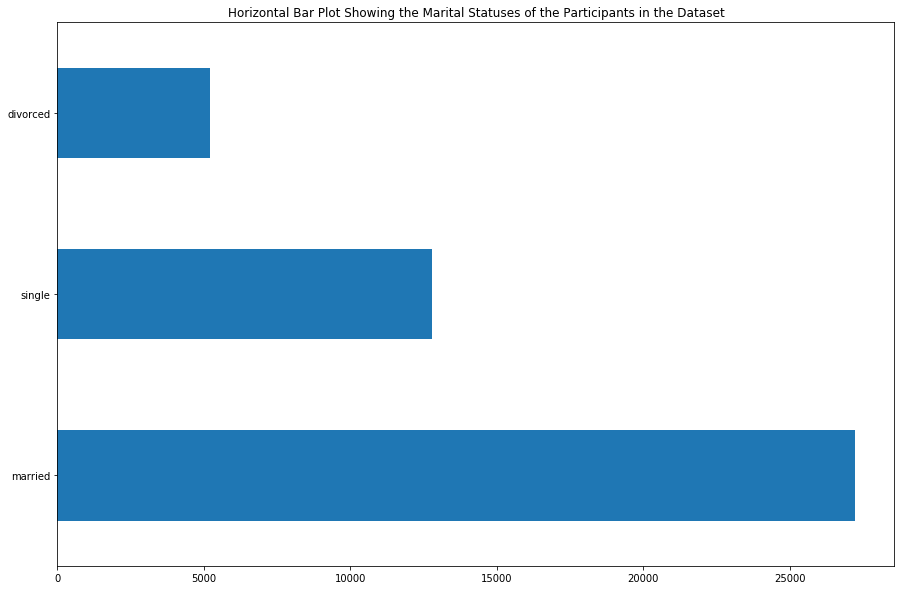

In [10]:
marital_status.plot.barh(figsize=(15,10))
plt.title('Horizontal Bar Plot Showing the Marital Statuses of the Participants in the Dataset', fontdict=None, loc='center', pad=None)

### Balance Box and Whiskers Plot

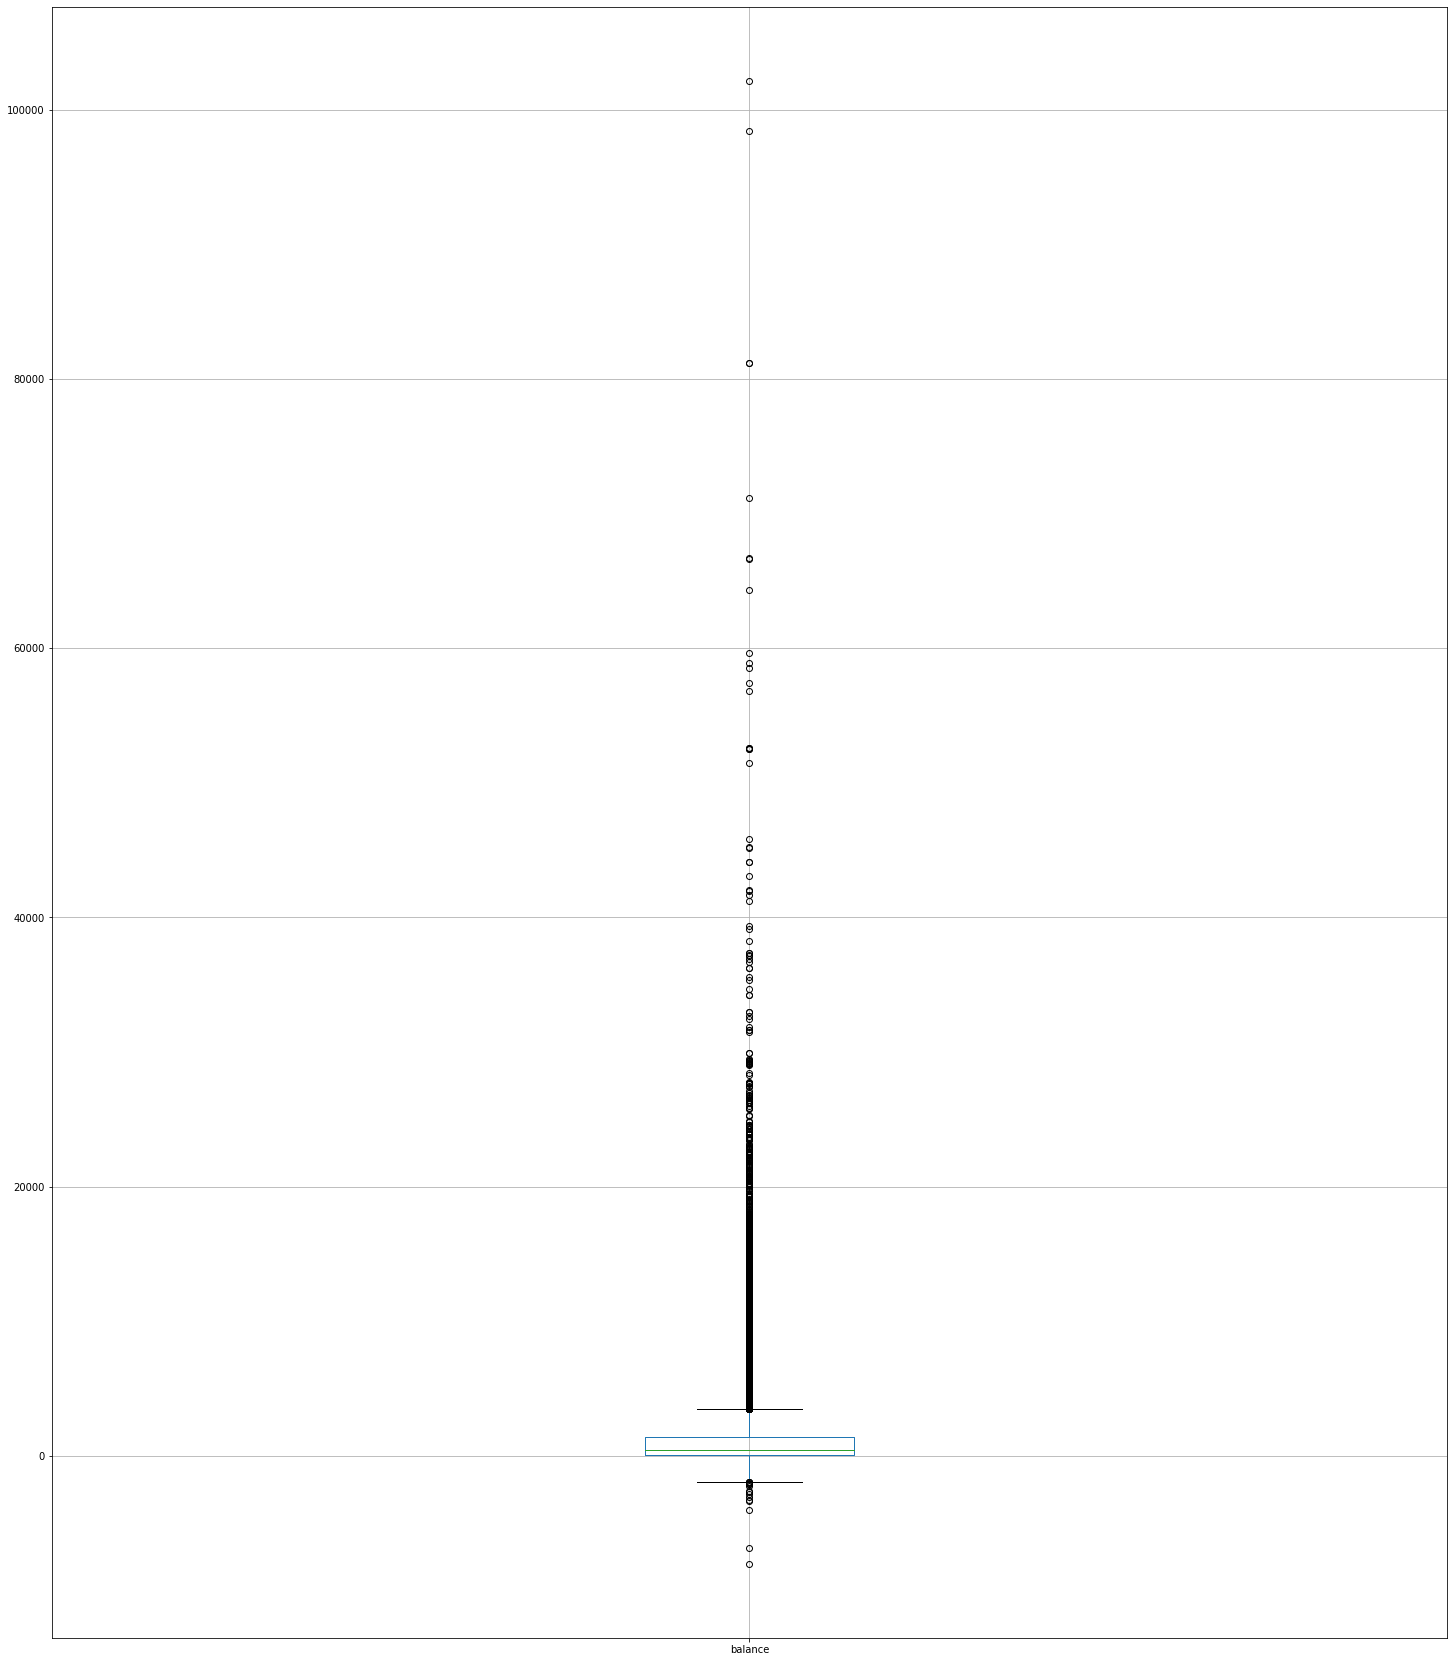

In [11]:
plt.figure(figsize=(25,30))
data.boxplot(column=['balance'])

### Age Histogram

<Figure size 1800x1080 with 0 Axes>

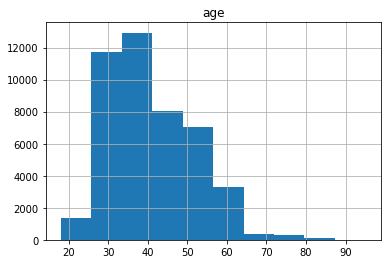

<Figure size 1800x1080 with 0 Axes>

In [12]:
data.hist(column=['age'])
plt.figure(figsize=(25,15))

### Data Preprocessing

In [13]:
data = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']].apply(lambda x: x.astype('category').cat.codes)

#### Setting up the Predictor Variables

In [14]:
X = data.iloc[:,data.columns != 'y']

#### Setting up the Target Variable

In [15]:
y= data.iloc[:,-1:]

#### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Logistic Regression Model

In [17]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

#### Predict using the Test set

In [18]:
pred = clf.predict(X_test)

### Model Evaluation

#### Model Accuracy

In [19]:
clf.score(X_test, y_test)

0.8793541966161672

#### Model Area Under the Curve

In [20]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.5